# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Antony Christ Hartono
- **Email:** hartono.antony@student.unmer.ac.id
- **ID Dicoding:** antonych

## Menentukan Pertanyaan Bisnis

- Di kota mana saja pelanggan e-commerce paling banyak berasal?
- Produk kategori apa yang paling laris berdasarkan jumlah pesanan dan pendapatan?
- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [100]:
customers_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [101]:
geolocation_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [102]:
order_items_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [103]:
order_payments_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [104]:
order_reviews_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [105]:
orders_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [106]:
product_category_name_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [107]:
products_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [108]:
sellers_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

**(customers_df)**
- Berisi informasi tentang data pelanggan, seperti customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.
- Bisa digunakan untuk analisis lokasi pelanggan dan distribusi geografis mereka.

**(geolocation_df)**
- Berisi informasi tentang data geolokasi, seperti geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state.
- Bisa digunakan untuk memetakan lokasi pelanggan dan penjual, serta membantu analisis regional.

**(order_items_df)**
- Berisi informasi tentang detail item setiap pesanan, seperti order_id	order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value.
- Bisa digunakan untuk analisis harga, tren produk terlaris, dan distribusi penjual.

**(order_payments_df)**
- Berisi informasi tentang data pembayaran pesanan, seperti order_id, payment_sequential, payment_type, payment_installments, payment_value.
- Bisa digunakan untuk melihat metode pembayaran yang paling populer dan preferensi pelanggan dalam transaksi.

**(order_reviews_df)**
- Berisi informasi tentang data ulasan terhadap pesanan, seperti review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp.
- Bisa digunakan untuk analisis sentimen dan kepuasan pelanggan.

**(orders_df)**
- Berisi informasi tentang pesanan, seperti order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.
- Bisa digunakan untuk analisis waktu pemrosesan pesanan dan tingkat keberhasilan pengiriman.

**(product_category_name_df)**
- Berisi informasi tentang terjemahan nama kategori produk, seperti product_category_name, product_category_name_english.
- Bisa digunakan untuk menyajikan kategori produk dalam analisis dengan lebih mudah dipahami.

**(products_df)**
- Berisi informasi tentang data produk, seperti product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm.
- Bisa digunakan untuk melihat distribusi produk berdasarkan kategori dan karakteristiknya.

**(sellers_df)**
- Berisi informasi tentang penjual, seperti seller_id, seller_zip_code_prefix, seller_city, seller_state.
- Bisa digunakan untuk analisis distribusi lokasi penjual dan konsentrasi bisnis di suatu area.

### Assessing Data

In [109]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [110]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [111]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [112]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [113]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [114]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [115]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [116]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [117]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [118]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [119]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [120]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [121]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [122]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [123]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [124]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [125]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [126]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [127]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [128]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [129]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [130]:
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


In [131]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [132]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [133]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [134]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [135]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [136]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [137]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [138]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- **(.info())** untuk mengetahui jumlah kolom, tipe data, dan apakah ada nilai kosong (null/missing values).
- **(.isna().sum())** untuk mengecek berapa banyak nilai kosong (NaN) di setiap kolom dataset.
- **(.duplicated().sum())** untuk mengindentifikasi apakah ada data yang berulang dalam setiap dataset.
- **(.describe())** untuk mendapatkan ringkasan statistik seperti mean (rata-rata), median, min, max, dan standar deviasi dari kolom numerik.

### Cleaning Data

In [139]:
geolocation_df.drop_duplicates(inplace=True)

In [140]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [141]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [142]:
order_reviews_df.fillna({'review_comment_title': '', 'review_comment_message': ''}, inplace=True)

In [143]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [144]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [145]:
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [146]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [147]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [148]:
products_df['product_category_name'].fillna('Unknown', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12008\3601906139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('Unknown', inplace=True)


In [149]:
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

In [150]:
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [151]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           609
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

**Insight:**

Menghapus duplikasi pada **geolocation_df**
- Duplikasi dalam dataset geolokasi dapat menyebabkan bias dalam analisis lokasi pelanggan dan penjual.
- Dengan menghapus duplikasi, kita memastikan bahwa setiap kode pos unik hanya muncul sekali, sehingga hasil analisis lokasi lebih akurat.

Menangani missing values pada **order_reviews_df**
- Kolom review_comment_title dan review_comment_message memiliki nilai kosong karena tidak semua pelanggan memberikan komentar.
- Mengisi nilai kosong dengan string kosong ('') mencegah error saat analisis teks atau visualisasi ulasan pelanggan.

Menangani missing values pada **orders_df**
- Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date sangat penting untuk analisis waktu pengiriman.
- Jika data ini kosong, kemungkinan besar pesanan tersebut dibatalkan atau tidak selesai, sehingga lebih baik dihapus untuk menjaga kualitas analisis.

Menangani missing values pada **products_df**
- Produk tanpa kategori dapat menyebabkan informasi yang tidak lengkap dalam analisis produk terlaris.
- Mengisi dengan "Unknown" memastikan bahwa produk tetap ada dalam analisis tanpa menghilangkan informasi lainnya.
- Kolom product_description_lenght diisi dengan rata-rata (mean) karena data bersifat numerik kontinu.
- Kolom product_photos_qty diisi dengan median, karena jumlah foto biasanya memiliki distribusi skewed (tidak normal).
- Dimensi produk penting untuk menghitung estimasi biaya pengiriman dan kapasitas logistik.
- Jika ada produk tanpa informasi berat atau ukuran, kemungkinan besar data tidak lengkap dan sebaiknya dihapus.

## Exploratory Data Analysis (EDA)

### Explorasi Data customers_df

In [152]:
customers_df['customer_city'].value_counts().head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

In [153]:
customers_df['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [154]:
customers_df['customer_zip_code_prefix'].value_counts().head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64

**Insight:**
- Menampilkan 10 kota dengan jumlah pelanggan terbanyak.
- Menghitung jumlah pelanggan berdasarkan negara bagian.
- Menampilkan 10 kode pos pelanggan yang paling umum.

### Explorasi Data geolocation_df

In [155]:
print(geolocation_df['geolocation_city'].value_counts().head(10))

geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
porto alegre       8702
salvador           8083
guarulhos          7411
brasilia           6919
osasco             4993
Name: count, dtype: int64


In [156]:
print(geolocation_df['geolocation_state'].value_counts())

geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: count, dtype: int64


In [157]:
top_zipcodes = geolocation_df['geolocation_zip_code_prefix'].value_counts().head(10)
print(top_zipcodes)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
38408    621
39400    620
35162    611
37200    596
35900    589
Name: count, dtype: int64


**Insight:**
- Menampilkan 10 kota dengan jumlah titik geolokasi terbanyak.
- Menghitung jumlah titik geolokasi per negara bagian.
- Menampilkan 10 kode pos dengan jumlah titik geolokasi terbanyak.

### Explorasi Data order_items_df

In [158]:
print(order_items_df['price'].describe())

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [159]:
top_products = order_items_df['product_id'].value_counts().head(10)
print(top_products)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


In [160]:
top_sellers = order_items_df['seller_id'].value_counts().head(10)
print(top_sellers)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64


In [161]:
print(order_items_df['freight_value'].describe())

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


**Insight:**
- Menampilkan ringkasan statistik harga produk, termasuk nilai mean (rata-rata), min (terendah), max (tertinggi), serta kuartil.
- Menampilkan 10 produk dengan jumlah penjualan terbanyak.
- Menampilkan 10 penjual dengan jumlah transaksi terbanyak.
- Menampilkan ringkasan statistik untuk biaya pengiriman.

### Explorasi Data order_payments_df

In [162]:
payment_counts = order_payments_df['payment_type'].value_counts()
print(payment_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [163]:
installments_counts = order_payments_df['payment_installments'].value_counts()
print(installments_counts)

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64


In [164]:
print(order_payments_df['payment_value'].describe())

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


In [165]:
total_payment_per_order = order_payments_df.groupby('order_id')['payment_value'].sum()
print(total_payment_per_order.describe())

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64


**Insight:**
- Menampilkan jumlah penggunaan setiap metode pembayaran.
- Menghitung jumlah transaksi berdasarkan jumlah cicilan yang digunakan dalam pembayaran.
- Menampilkan ringkasan statistik dari jumlah pembayaran yang dilakukan.
- Menghitung total pembayaran per order dan menampilkan statistik deskriptifnya.

### Explorasi Data order_reviews_df

In [166]:
review_counts = order_reviews_df['review_score'].value_counts()
print(review_counts)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


In [167]:
has_comment = order_reviews_df.dropna(subset=['review_comment_message'])
no_comment = order_reviews_df[order_reviews_df['review_comment_message'].isnull()]

print("Rata-rata skor review dengan komentar:", has_comment['review_score'].mean())
print("Rata-rata skor review tanpa komentar:", no_comment['review_score'].mean())

Rata-rata skor review dengan komentar: 4.08642062404257
Rata-rata skor review tanpa komentar: nan


In [168]:
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])  # Perbaikan di sini

order_reviews_df['response_time'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']).dt.days

print(order_reviews_df['response_time'].describe())

count    99224.000000
mean         2.582248
std          9.890526
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        518.000000
Name: response_time, dtype: float64


**Insight:**
- Menghitung jumlah masing-masing skor review (1–5).
- Membandingkan rata-rata skor review antara pelanggan yang memberikan komentar dan yang tidak.
- Menghitung jumlah hari yang dibutuhkan untuk merespons review pelanggan.

### Explorasi Data orders_df

In [169]:
status_counts = orders_df['order_status'].value_counts()
print(status_counts)

order_status
delivered    96455
canceled         6
Name: count, dtype: int64


In [170]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

orders_df['approval_time'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 3600  # dalam jam

print(orders_df['approval_time'].describe())

count    96461.000000
mean        10.277733
std         20.535596
min          0.000000
25%          0.215278
50%          0.343333
75%         14.518056
max        741.443611
Name: approval_time, dtype: float64


In [171]:
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])

orders_df['processing_time'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.days
print(orders_df['processing_time'].describe())

count    96461.000000
mean         2.295923
std          3.548444
min       -172.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: processing_time, dtype: float64


In [172]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

orders_df['shipping_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days
print(orders_df['shipping_time'].describe())

count    96461.000000
mean         8.878396
std          8.746673
min        -17.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: shipping_time, dtype: float64


In [173]:
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days
print(orders_df['delivery_delay'].describe())

count    96461.000000
mean       -11.875577
std         10.183476
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64


**Insight:**
- Menghitung jumlah pesanan berdasarkan statusnya (seperti delivered, canceled, shipped, dll.).
- Menghitung berapa lama waktu yang dibutuhkan untuk menyetujui pesanan setelah pelanggan melakukan pembelian (dalam jam).
- Menghitung jumlah hari yang dibutuhkan untuk memproses pesanan hingga diserahkan kepada kurir.
- Menghitung jumlah hari yang dibutuhkan sejak pesanan diserahkan ke kurir hingga sampai ke pelanggan.
- Menghitung keterlambatan pengiriman, yaitu perbedaan antara tanggal perkiraan dan tanggal aktual pengiriman.

### Explorasi Data product_category_name_df

In [174]:
merged_df = order_items_df.merge(products_df, on="product_id", how="left") \
                          .merge(product_category_name_df, on="product_category_name", how="left")
category_counts = merged_df['product_category_name_english'].value_counts()
print(category_counts.head(10))

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64


In [175]:
avg_price_per_category = merged_df.groupby('product_category_name_english')['price'].mean().sort_values(ascending=False)
print(avg_price_per_category.head(10))

product_category_name_english
computers                                1098.340542
small_appliances_home_oven_and_coffee     624.285658
home_appliances_2                         476.124958
agro_industry_and_commerce                342.124858
musical_instruments                       281.616000
small_appliances                          280.778468
fixed_telephony                           225.693182
construction_tools_safety                 208.992371
watches_gifts                             201.135984
air_conditioning                          185.269226
Name: price, dtype: float64


In [176]:
merged_reviews = merged_df.merge(order_reviews_df, on="order_id", how="left")
avg_review_per_category = merged_reviews.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)
print(avg_review_per_category.head(10))

product_category_name_english
cds_dvds_musicals                        4.642857
fashion_childrens_clothes                4.500000
books_general_interest                   4.446266
costruction_tools_tools                  4.444444
flowers                                  4.419355
books_imported                           4.400000
books_technical                          4.368421
food_drink                               4.315412
luggage_accessories                      4.315257
small_appliances_home_oven_and_coffee    4.302632
Name: review_score, dtype: float64


**Insight:**
- Menghitung jumlah produk yang termasuk dalam setiap kategori dan menampilkan 10 kategori teratas.
- Menghitung rata-rata harga produk untuk setiap kategori dan menampilkan 10 kategori dengan harga tertinggi.
- Menghitung rata-rata skor review untuk setiap kategori produk dan menampilkan 10 kategori dengan review terbaik.

### Explorasi Data products_df

In [177]:
category_counts = products_df['product_category_name'].value_counts()
print(category_counts.head(10))

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


In [178]:
heavy_products = merged_df.groupby('product_weight_g')['order_item_id'].count().sort_values(ascending=False)
print(heavy_products.head(10))

product_weight_g
200.0    6778
150.0    5276
250.0    4520
300.0    4258
400.0    3613
100.0    3490
350.0    3161
500.0    2696
600.0    2695
700.0    2050
Name: order_item_id, dtype: int64


**Insight:**
- Menghitung jumlah produk dalam setiap kategori dan menampilkan 10 kategori dengan jumlah produk terbanyak.
- Menghitung jumlah pesanan berdasarkan berat produk dan menampilkan 10 berat produk yang paling sering dipesan.

### Explorasi Data sellers_df

In [179]:
city_counts = sellers_df['seller_city'].value_counts()
print(city_counts.head(10))

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


**Insight:**
- Menghitung jumlah seller berdasarkan kota dan menampilkan 10 kota dengan jumlah seller terbanyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di kota mana saja pelanggan e-commerce paling banyak berasal?

In [180]:
city_distribution = customers_df["customer_city"].value_counts().reset_index()
city_distribution.columns = ["customer_city", "customer_count"]

print("Top 10 Kota dengan Jumlah Pelanggan Terbanyak:")
print(city_distribution.head(10))

Top 10 Kota dengan Jumlah Pelanggan Terbanyak:
           customer_city  customer_count
0              sao paulo           15540
1         rio de janeiro            6882
2         belo horizonte            2773
3               brasilia            2131
4               curitiba            1521
5               campinas            1444
6           porto alegre            1379
7               salvador            1245
8              guarulhos            1189
9  sao bernardo do campo             938


C:\Users\USER\AppData\Local\Temp\ipykernel_12008\2801380184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities["customer_count"], y=top_10_cities["customer_city"], palette="Blues_r")


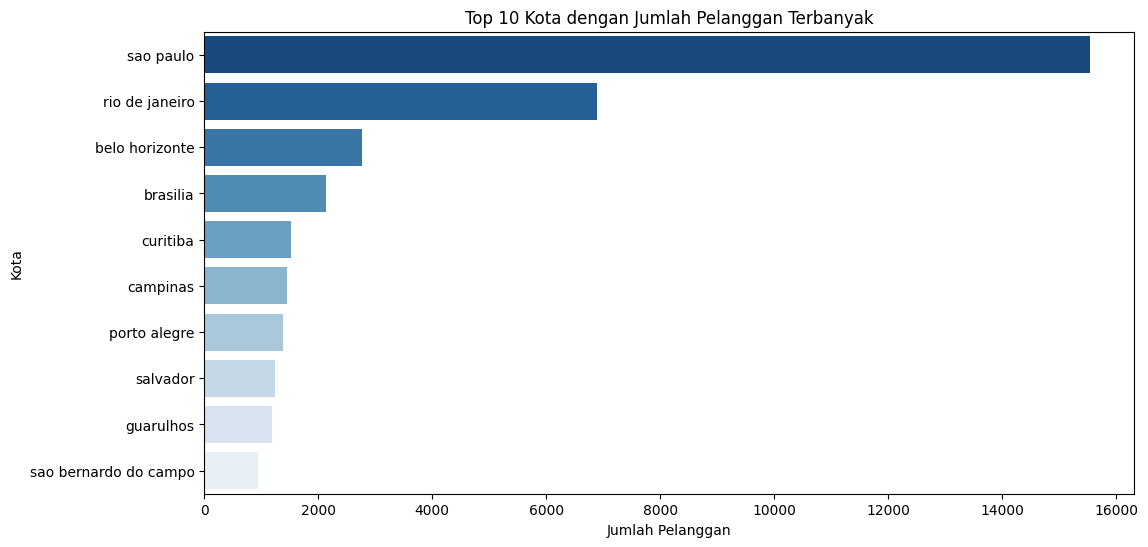

In [181]:
top_10_cities = city_distribution.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities["customer_count"], y=top_10_cities["customer_city"], palette="Blues_r")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Top 10 Kota dengan Jumlah Pelanggan Terbanyak")
plt.show()

**Insight**
- Dari hasil bar chart, terlihat bahwa kota yang memiliki jumlah pelanggan e-commerce tertinggi dibandingkan kota lainnya adalah **sao paulo**.

### Pertanyaan 2: Produk kategori apa yang paling laris berdasarkan jumlah pesanan dan pendapatan?

In [182]:
category_orders = merged_df["product_category_name_english"].value_counts().reset_index()
category_orders.columns = ["product_category", "order_count"]

print("Top 10 Kategori Produk Berdasarkan Jumlah Pesanan:")
print(category_orders.head(10))

Top 10 Kategori Produk Berdasarkan Jumlah Pesanan:
        product_category  order_count
0         bed_bath_table        11115
1          health_beauty         9670
2         sports_leisure         8641
3        furniture_decor         8334
4  computers_accessories         7827
5             housewares         6964
6          watches_gifts         5991
7              telephony         4545
8           garden_tools         4347
9                   auto         4235


C:\Users\USER\AppData\Local\Temp\ipykernel_12008\2492596228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_orders["order_count"], y=top_10_orders["product_category"], palette="Paired")


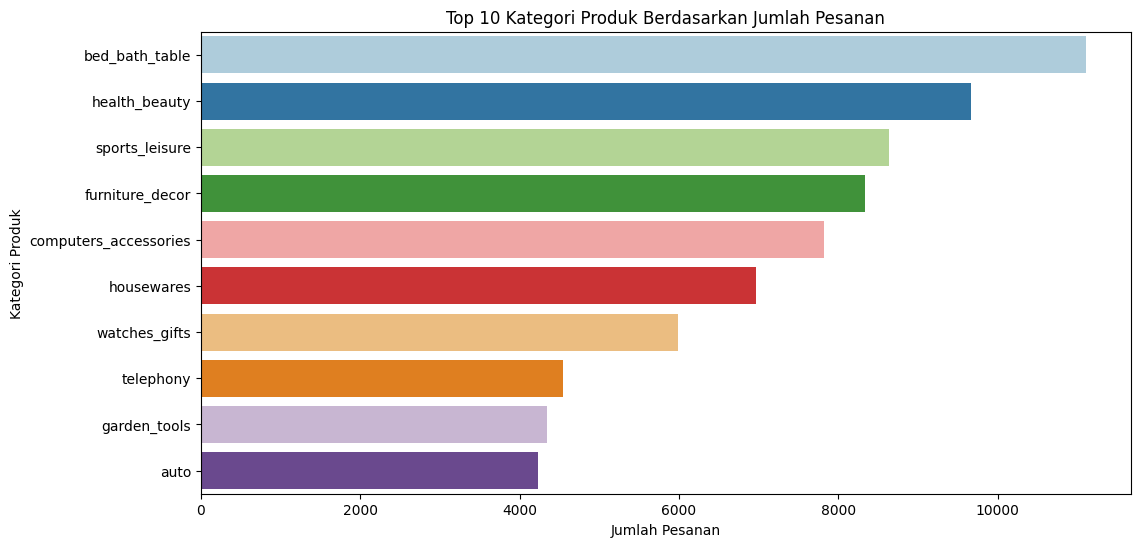

In [183]:
top_10_orders = category_orders.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_orders["order_count"], y=top_10_orders["product_category"], palette="Paired")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk Berdasarkan Jumlah Pesanan")
plt.show()

In [184]:
category_revenue = merged_df.groupby("product_category_name_english")["price"].sum().reset_index()
category_revenue = category_revenue.sort_values(by="price", ascending=False)

print("Top 5 Kategori Produk Berdasarkan Jumlah Pendapatan:")
print(category_revenue.head(5))

Top 5 Kategori Produk Berdasarkan Jumlah Pendapatan:
   product_category_name_english       price
43                 health_beauty  1258681.34
70                 watches_gifts  1205005.68
7                 bed_bath_table  1036988.68
65                sports_leisure   988048.97
15         computers_accessories   911954.32


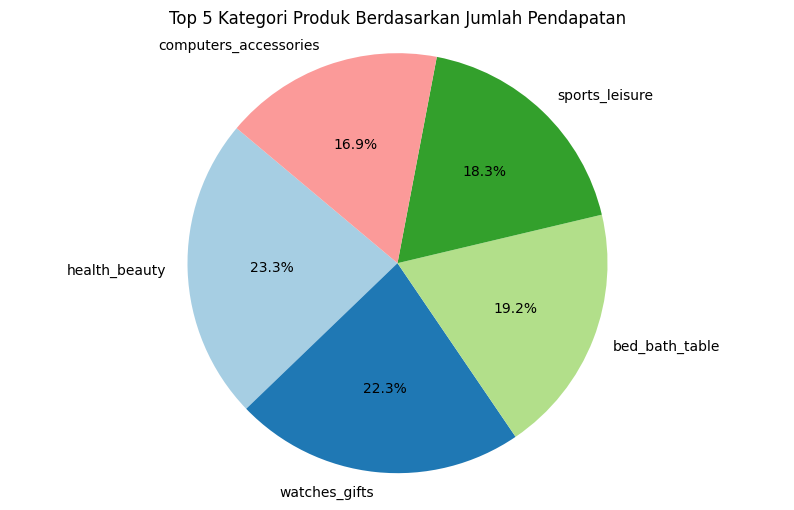

In [185]:
top_5_revenue = category_revenue.head(5)

plt.figure(figsize=(10, 6))
plt.pie(top_5_revenue["price"], labels=top_5_revenue["product_category_name_english"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Kategori Produk Berdasarkan Jumlah Pendapatan")
plt.axis("equal")
plt.show()

**Insight**
- Dari hasil bar chart, terlihat bahwa kategori produk yang paling laris berdasarkan jumlah pesanan adalah **bed_bath_table**.
- Dari hasil pie chart, terlihat bahwa kategori produk dengan total pendapatan tertinggi adalah **health_beauty**.

### Pertanyaan 3: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

In [186]:
payment_counts = order_payments_df["payment_type"].value_counts().reset_index()
payment_counts.columns = ["payment_type", "count"]

print("Top 5 Metode Pembayaran Paling Sering Digunakan:")
print(payment_counts.head(5))

Top 5 Metode Pembayaran Paling Sering Digunakan:
  payment_type  count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3


C:\Users\USER\AppData\Local\Temp\ipykernel_12008\1154276714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_payments["payment_type"], y=top_5_payments["count"], palette="Blues_r")


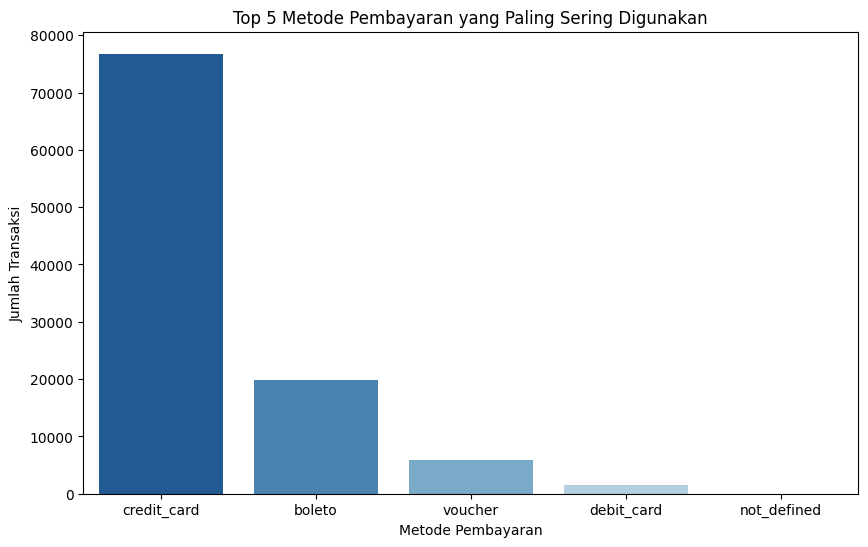

In [187]:
top_5_payments = payment_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_payments["payment_type"], y=top_5_payments["count"], palette="Blues_r")

plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Top 5 Metode Pembayaran yang Paling Sering Digunakan")

plt.show()

**Insight:**
 - Dari hasil bar chart, terlihat bahwa metode pembayaran terpopuler adalah **credit_card**.

## Analisis Lanjutan (Opsional)

In [188]:
rfm_df = orders_df.merge(order_items_df, on="order_id").merge(customers_df, on="customer_id")

rfm_df["order_purchase_timestamp"] = pd.to_datetime(rfm_df["order_purchase_timestamp"])

latest_date = rfm_df["order_purchase_timestamp"].max()

rfm = rfm_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (latest_date - x.max()).days, 
    "order_id": "count",  
    "price": "sum"  
}).reset_index()

rfm.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])

rfm["F_Score"] = pd.cut(rfm["Frequency"], bins=[0, 1, 2, 5, rfm["Frequency"].max()], labels=[1, 2, 3, 4], include_lowest=True)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4], duplicates="drop")

rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

print("Jumlah pelanggan unik dalam dataset RFM:", rfm["customer_unique_id"].nunique())
print("\nTop 10 Pelanggan Berdasarkan RFM Score:")
print(rfm.head(10))

Jumlah pelanggan unik dalam dataset RFM: 93342

Top 10 Pelanggan Berdasarkan RFM Score:
                 customer_unique_id  Recency  Frequency  Monetary R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    129.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     18.90       3   
2  0000f46a3911fa3c0805444483337064      536          1     69.00       1   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     25.99       2   
4  0004aac84e0df4da2b147fca70cf8255      287          1    180.00       2   
5  0004bd2a26a76fe21f786e4fbd80607f      145          1    154.00       3   
6  00050ab1314c0e55a6ca13cf7181fecf      131          1     27.99       3   
7  00053a61a98854899e70ed204dd4bafe      182          2    382.00       3   
8  0005e1862207bf6ccc02e4228effd9a0      542          1    135.00       1   
9  0005ef4cd20d2893f0d9fbd94d3c0d97      169          1    104.90       3   

  F_Score M_Score RFM_Score  
0       1       3       413  
1   

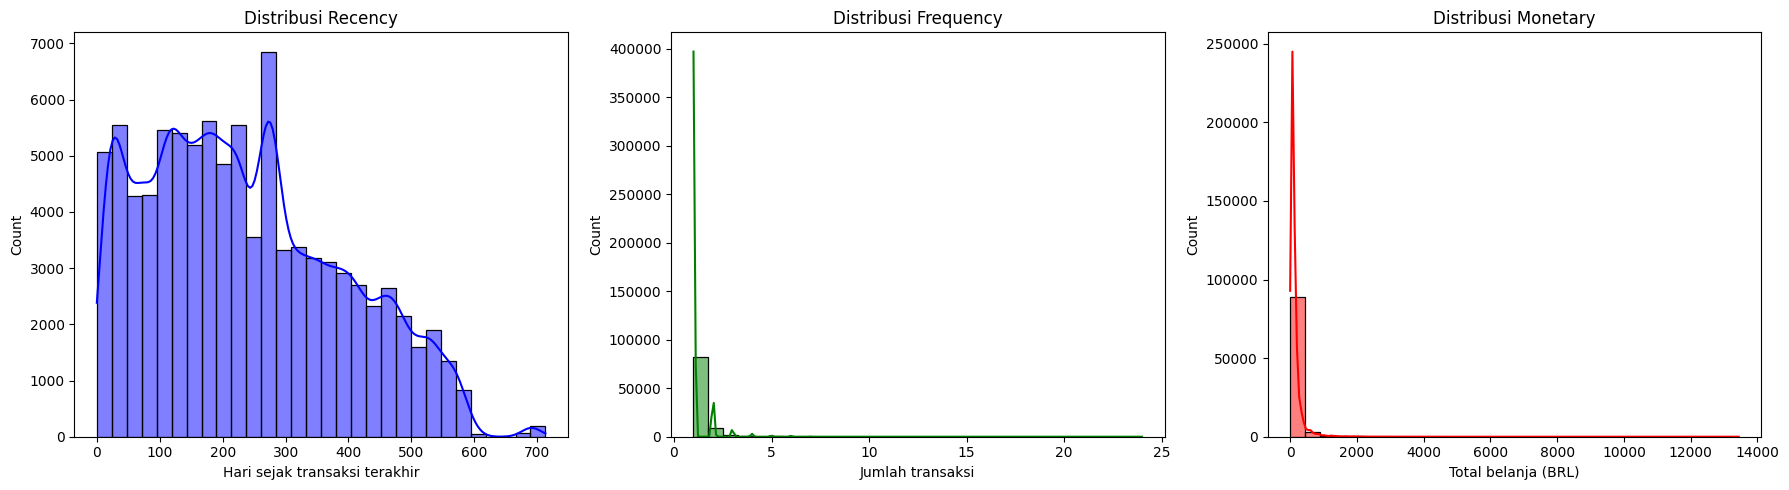

In [189]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribusi Recency")
axes[0].set_xlabel("Hari sejak transaksi terakhir")

sns.histplot(rfm["Frequency"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribusi Frequency")
axes[1].set_xlabel("Jumlah transaksi")

sns.histplot(rfm["Monetary"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribusi Monetary")
axes[2].set_xlabel("Total belanja (BRL)")

plt.tight_layout()
plt.show()

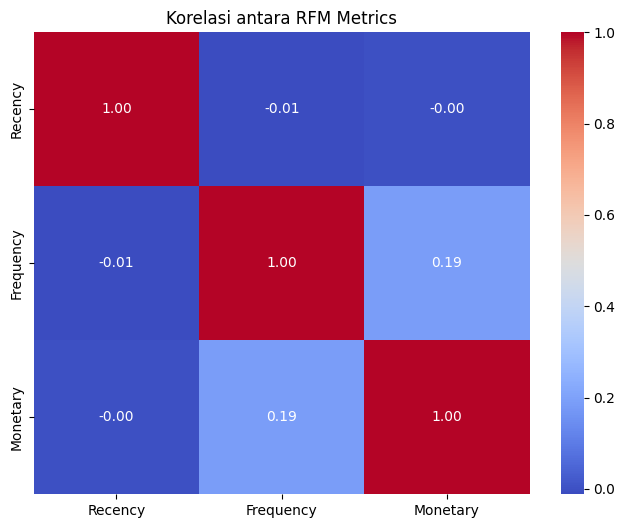

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[["Recency", "Frequency", "Monetary"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara RFM Metrics")
plt.show()

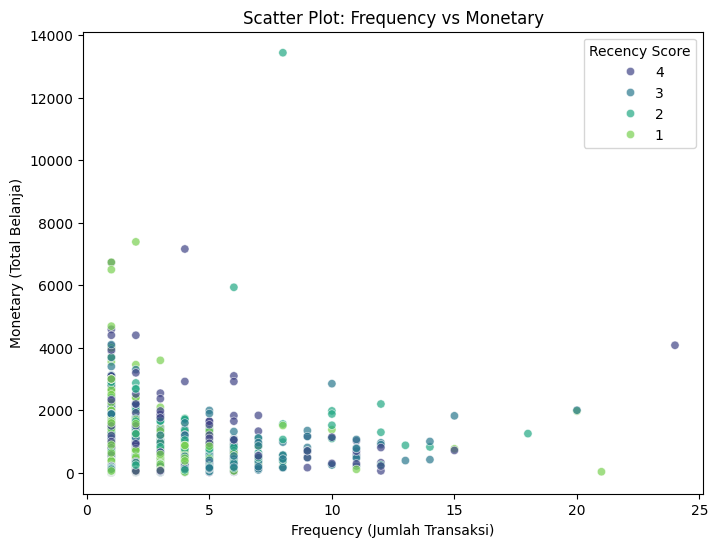

In [191]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm["Frequency"], y=rfm["Monetary"], hue=rfm["R_Score"], palette="viridis", alpha=0.7)
plt.title("Scatter Plot: Frequency vs Monetary")
plt.xlabel("Frequency (Jumlah Transaksi)")
plt.ylabel("Monetary (Total Belanja)")
plt.legend(title="Recency Score")
plt.show()

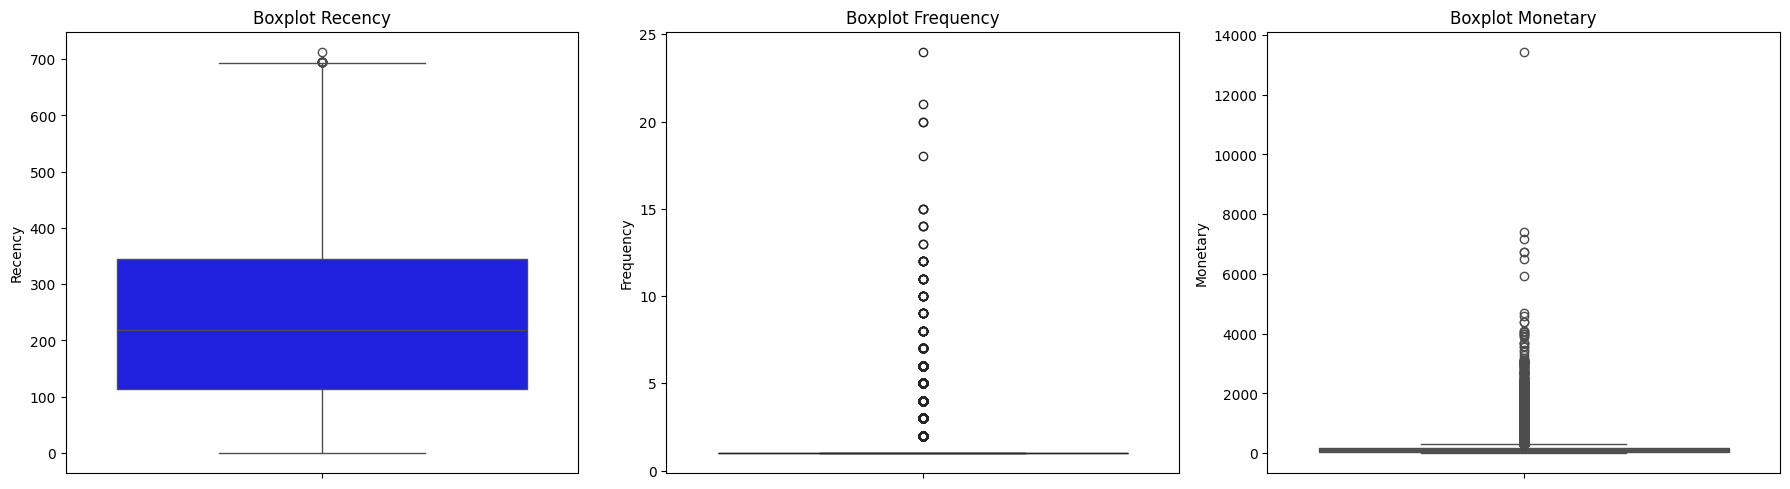

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=rfm["Recency"], ax=axes[0], color="blue")
axes[0].set_title("Boxplot Recency")

sns.boxplot(y=rfm["Frequency"], ax=axes[1], color="green")
axes[1].set_title("Boxplot Frequency")

sns.boxplot(y=rfm["Monetary"], ax=axes[2], color="red")
axes[2].set_title("Boxplot Monetary")

plt.tight_layout()
plt.show()

**Insight:**
 
Distribusi Recency, Frequency, dan Monetary (Histogram) 
- Recency: Mayoritas pelanggan memiliki nilai Recency yang tinggi, artinya banyak pelanggan yang sudah lama tidak melakukan transaksi. Ini menunjukkan potensi pelanggan yang "dorman" dan mungkin perlu strategi re-engagement.
- Frequency: Distribusi Frequency menunjukkan bahwa sebagian besar pelanggan hanya bertransaksi sekali atau dua kali saja. Ini mengindikasikan bahwa e-commerce ini memiliki banyak pelanggan one-time buyers yang belum menjadi pelanggan setia.
- Monetary: Sebagian besar pelanggan memiliki total belanja yang rendah, tetapi ada beberapa pelanggan dengan nilai Monetary yang sangat tinggi (long tail). Ini menunjukkan bahwa segmen pelanggan dengan belanja tinggi sangat sedikit dibandingkan dengan pelanggan biasa.

Heatmap Korelasi antara Recency, Frequency, dan Monetary
- Frequency & Monetary memiliki korelasi positif yang cukup tinggi. Ini berarti semakin sering pelanggan bertransaksi, semakin besar pula total belanja mereka.
- Recency memiliki korelasi negatif dengan Frequency & Monetary. Artinya, pelanggan yang lebih sering berbelanja (high Frequency) cenderung memiliki Recency yang lebih rendah (baru saja berbelanja).

Scatter Plot: Frequency vs Monetary (Segmentasi Pelanggan)
- Pelanggan dengan Frequency tinggi cenderung memiliki nilai Monetary yang tinggi.
- Sebagian besar pelanggan berada di bagian bawah grafik, menandakan banyak pelanggan dengan Frequency dan Monetary yang rendah.
- Ada beberapa outlier, yaitu pelanggan dengan Monetary yang sangat tinggi meskipun Frequency-nya tidak terlalu tinggi.

Boxplot untuk Recency, Frequency, dan Monetary
- Recency: Ada outlier yang sangat besar, yang berarti beberapa pelanggan sudah sangat lama tidak bertransaksi.
- Frequency: Banyak pelanggan yang hanya memiliki satu atau dua transaksi, sedangkan pelanggan dengan Frequency tinggi adalah outlier.
- Monetary: Ada distribusi yang miring, dengan banyak pelanggan memiliki belanja rendah, tetapi sedikit pelanggan dengan belanja sangat tinggi.

## Conclution

Conclution Pertanyaan 1
- Sao Paulo adalah pasar utama untuk e-commerce di Brasil, diikuti oleh Rio de Janeiro. Distribusi pelanggan menunjukkan bahwa kota-kota besar dan metropolitan lebih dominan dalam jumlah pelanggan, sehingga strategi pemasaran dan operasional harus disesuaikan dengan kondisi pasar di kota-kota ini.

Conclution Pertanyaan 2
- Kategori produk terlaris berdasarkan jumlah pesanan adalah "bed_bath_table", menandakan bahwa produk rumah tangga banyak diminati.
- Kategori produk dengan pendapatan tertinggi adalah "health_beauty", menunjukkan bahwa produk kesehatan dan kecantikan memiliki harga yang lebih tinggi.
- Ada perbedaan antara jumlah pesanan dan pendapatan, sehingga strategi bisnis harus disesuaikan berdasarkan tujuan utama apakah ingin meningkatkan volume penjualan atau meningkatkan pendapatan per pesanan.

Conclution Pertanyaan 3
- Kartu kredit adalah metode pembayaran paling dominan, digunakan dalam hampir 77.000 transaksi, jauh lebih tinggi dibandingkan metode lainnya.

In [195]:
import pandas as pd

customers_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\customers_dataset.csv")
geolocation_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\geolocation_dataset.csv")
order_items_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_items_dataset.csv")
order_payments_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_payments_dataset.csv")
order_reviews_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\order_reviews_dataset.csv")
orders_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\orders_dataset.csv")
product_category_name_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\product_category_name_translation.csv")
products_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\products_dataset.csv")
sellers_df = pd.read_csv(r"C:\Users\USER\Downloads\E-Commerce Public Dataset\sellers_dataset.csv")

all_df = orders_df.merge(customers_df, on="customer_id", how="left")

all_df = all_df.merge(order_items_df, on="order_id", how="left")

all_df = all_df.merge(order_payments_df, on="order_id", how="left")

all_df = all_df.merge(order_reviews_df, on="order_id", how="left")

all_df = all_df.merge(products_df, on="product_id", how="left")

all_df = all_df.merge(product_category_name_df, on="product_category_name", how="left")

all_df = all_df.merge(sellers_df, on="seller_id", how="left")

all_df.to_csv("all_data.csv", index=False)

print("Penggabungan selesai! Data disimpan sebagai all_data.csv")

Penggabungan selesai! Data disimpan sebagai all_data.csv
